<a href="https://colab.research.google.com/github/DevP-ai/Machine-Learning/blob/master/Standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("/content/Social_Network_Ads.csv")

In [5]:
df=df.iloc[:,2:]

In [6]:
df.sample(5)

,Age,EstimatedSalary,Purchased
68,22,63000,0
12,20,86000,0
324,48,131000,1
313,49,141000,1
198,26,80000,0


# **Train Test Split**

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),
              df['Purchased'],test_size=0.3,random_state=0)

In [35]:
X_train.shape,X_test.shape

((280, 2), (120, 2))

# **Standardization**

In [18]:
from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()
scalar.fit(X_train)

StandardScaler()

In [37]:
scalar.mean_

array([3.78642857e+01, 6.98071429e+04])

In [39]:
X_train_scaled=scalar.transform(X_train)
X_test_scaled=scalar.transform(X_test)

In [40]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [43]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [44]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [45]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# **Effect of Scaling**

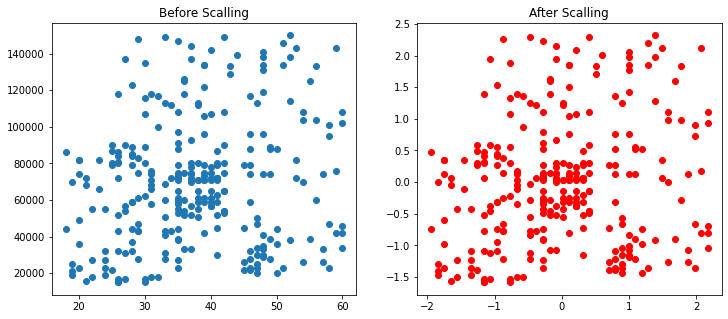

In [47]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Before Scalling")

ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],
            color='r')
ax2.set_title("After Scalling")

plt.show()

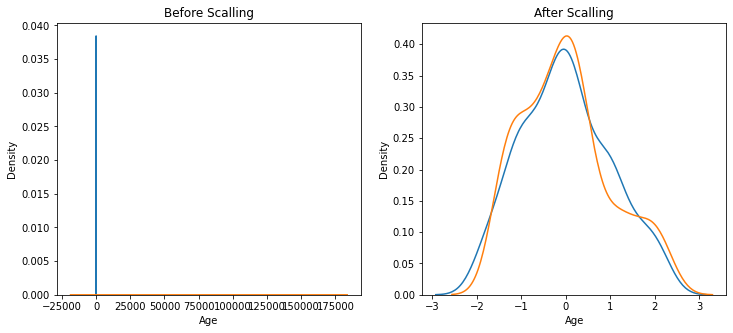

In [48]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

ax1.set_title("Before Scalling")

sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)

ax2.set_title("After Scalling")

plt.show()

# **Comparision of Distribution**

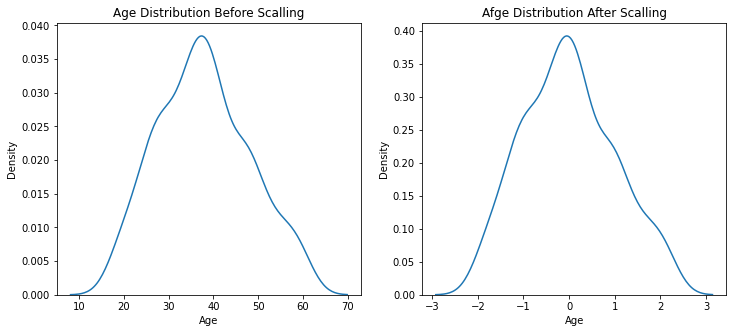

In [49]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

sns.kdeplot(X_train['Age'],ax=ax1)
# sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

ax1.set_title("Age Distribution Before Scalling")

sns.kdeplot(X_train_scaled['Age'],ax=ax2)
# sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)

ax2.set_title("Afge Distribution After Scalling")

plt.show()

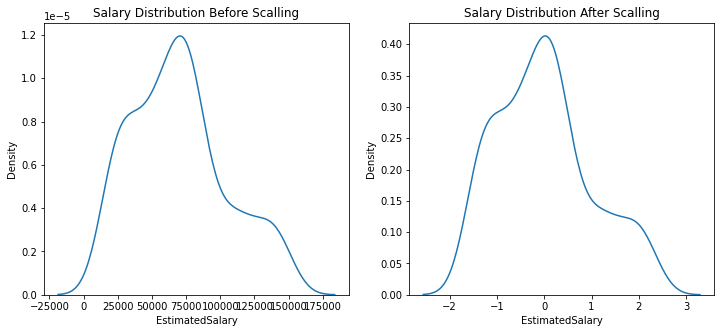

In [50]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

# sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

ax1.set_title("Salary Distribution Before Scalling")

# sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)

ax2.set_title("Salary Distribution After Scalling")

plt.show()